# Study friend information

This notebook looks at the players friend information.

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [84]:
df = pd.read_csv("player_friend_info_11_June.csv").drop("Unnamed: 0", axis='columns')

In [85]:
df.head()

,friend_since,relationship,steamid,steamid_orig
0,1253251937,friend,76561197960265738,76561197960434622
1,1361927255,friend,76561197960265740,76561197960434622
2,1238207048,friend,76561197960265743,76561197960434622
3,1518389583,friend,76561197960265754,76561197960434622
4,1334200510,friend,76561197960265838,76561197960434622


In [86]:
df.tail()

,friend_since,relationship,steamid,steamid_orig
2959029,1315256354,friend,76561198024798306,76561197993935320
2959030,1346115469,friend,76561198050708677,76561197993935320
2959031,1349984567,friend,76561198067214914,76561197993935320
2959032,1512134787,friend,76561198267071960,76561197993935320
2959033,1519582601,friend,76561198393197258,76561197993935320


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959034 entries, 0 to 2959033
Data columns (total 4 columns):
friend_since    int64
relationship    object
steamid         int64
steamid_orig    int64
dtypes: int64(3), object(1)
memory usage: 90.3+ MB


In [88]:
df['steamid'].nunique()

1488858

In [89]:
df['steamid_orig'].nunique()

15256

In [90]:
df['relationship'].nunique()

1

In [91]:
df = df.drop('relationship',axis='columns')

In [92]:
df['Root'] = (df['steamid_orig'] == 76561197960434622)

In [93]:
df.head()

,friend_since,steamid,steamid_orig,Root
0,1253251937,76561197960265738,76561197960434622,True
1,1361927255,76561197960265740,76561197960434622,True
2,1238207048,76561197960265743,76561197960434622,True
3,1518389583,76561197960265754,76561197960434622,True
4,1334200510,76561197960265838,76561197960434622,True


In [94]:
df.tail()

,friend_since,steamid,steamid_orig,Root
2959029,1315256354,76561198024798306,76561197993935320,False
2959030,1346115469,76561198050708677,76561197993935320,False
2959031,1349984567,76561198067214914,76561197993935320,False
2959032,1512134787,76561198267071960,76561197993935320,False
2959033,1519582601,76561198393197258,76561197993935320,False


In [95]:
First_tier = list(df[df['Root']]['steamid'])

In [96]:
df['First_tier'] = df['steamid_orig'].apply(lambda x: x in First_tier)

In [97]:
Second_tier = list(df[df['First_tier']]['steamid'])

In [98]:
df['Second_tier'] = df['steamid_orig'].apply(lambda x: x in Second_tier)

In [99]:
df[~df['Second_tier'] & ~df['First_tier']]

,friend_since,steamid,steamid_orig,Root,First_tier,Second_tier


In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
df_num_Friends = (df.groupby('steamid_orig').count()['steamid']).to_frame()

In [102]:
df_num_Friends = df_num_Friends.reset_index()

In [103]:
df_num_Friends['num_Friends'] = df_num_Friends['steamid']

In [104]:
df_num_Friends[df_num_Friends['steamid_orig'] == 76561197960434622]

,steamid_orig,steamid,num_Friends
202,76561197960434622,175,175


In [105]:
df_num_Friends = df_num_Friends.drop('steamid',axis='columns')

In [106]:
df_num_Friends['steamid'] = df_num_Friends['steamid_orig']

In [107]:
df_num_Friends = df_num_Friends.drop('steamid_orig',axis='columns')

In [108]:
df_num_Friends.head()

,num_Friends,steamid
0,9,76561197960265730
1,176,76561197960265731
2,70,76561197960265733
3,91,76561197960265738
4,66,76561197960265743


In [135]:
df_max = df.loc[df.groupby('steamid_orig')['friend_since'].idxmax()]

In [136]:
df_max = df_max.reset_index()

In [137]:
df_max.head()

,index,friend_since,steamid,steamid_orig,Root,First_tier,Second_tier
0,580327,1455906659,76561198018064800,76561197960265730,False,False,True
1,83542,1557289235,76561198009246617,76561197960265731,False,False,True
2,1330447,1498068231,76561197972491988,76561197960265733,False,False,True
3,7439,1548739620,76561198262909170,76561197960265738,False,True,True
4,3118,1534367618,76561198348711414,76561197960265743,False,True,True


In [138]:
df_max[df_max['steamid_orig'] == 76561197960434622]

,index,friend_since,steamid,steamid_orig,Root,First_tier,Second_tier
202,147,1559884406,76561198012034243,76561197960434622,True,False,True


In [139]:
df_max['newest_friend_time'] = pd.to_datetime(df_max['friend_since'], unit='s')

In [140]:
df_max['newest_friend_steamid'] = df_max['steamid']

In [141]:
df_max = df_max.drop(['index','friend_since','steamid'],axis='columns')
df_max.head()

,steamid_orig,Root,First_tier,Second_tier,newest_friend_time,newest_friend_steamid
0,76561197960265730,False,False,True,2016-02-19 18:30:59,76561198018064800
1,76561197960265731,False,False,True,2019-05-08 04:20:35,76561198009246617
2,76561197960265733,False,False,True,2017-06-21 18:03:51,76561197972491988
3,76561197960265738,False,True,True,2019-01-29 05:27:00,76561198262909170
4,76561197960265743,False,True,True,2018-08-15 21:13:38,76561198348711414


In [142]:
df_max['steamid'] = df_max['steamid_orig']
df_max = df_max.drop('steamid_orig',axis='columns')
df_max.head()

,Root,First_tier,Second_tier,newest_friend_time,newest_friend_steamid,steamid
0,False,False,True,2016-02-19 18:30:59,76561198018064800,76561197960265730
1,False,False,True,2019-05-08 04:20:35,76561198009246617,76561197960265731
2,False,False,True,2017-06-21 18:03:51,76561197972491988,76561197960265733
3,False,True,True,2019-01-29 05:27:00,76561198262909170,76561197960265738
4,False,True,True,2018-08-15 21:13:38,76561198348711414,76561197960265743


In [143]:
df_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15256 entries, 0 to 15255
Data columns (total 6 columns):
Root                     15256 non-null bool
First_tier               15256 non-null bool
Second_tier              15256 non-null bool
newest_friend_time       15256 non-null datetime64[ns]
newest_friend_steamid    15256 non-null int64
steamid                  15256 non-null int64
dtypes: bool(3), datetime64[ns](1), int64(2)
memory usage: 402.3 KB


In [144]:
df_max.nunique()

Root                         2
First_tier                   2
Second_tier                  2
newest_friend_time       15084
newest_friend_steamid    14218
steamid                  15256
dtype: int64

In [145]:
df_min = df.loc[df.groupby('steamid_orig')['friend_since'].idxmin()]

In [146]:
df_min = df_min.reset_index()

In [147]:
df_min.head()

,index,friend_since,steamid,steamid_orig,Root,First_tier,Second_tier
0,580325,1347313517,76561197974593417,76561197960265730,False,False,True
1,83401,0,76561197960265733,76561197960265731,False,False,True
2,1330413,0,76561197960265731,76561197960265733,False,False,True
3,7351,0,76561197960265731,76561197960265738,False,True,True
4,3053,0,76561197960265737,76561197960265743,False,True,True


In [148]:
df_min[df_min['steamid_orig'] == 76561197960434622]

,index,friend_since,steamid,steamid_orig,Root,First_tier,Second_tier
202,9,0,76561197960408176,76561197960434622,True,False,True


In [149]:
df_min['oldest_friend_time'] = pd.to_datetime(df_min['friend_since'], unit='s')

In [150]:
df_min['oldest_friend_steamid'] = df_min['steamid']

In [152]:
df_min = df_min.drop(['index','friend_since','steamid'],axis='columns')
df_min.head()

,steamid_orig,Root,First_tier,Second_tier,oldest_friend_time,oldest_friend_steamid
0,76561197960265730,False,False,True,2012-09-10 21:45:17,76561197974593417
1,76561197960265731,False,False,True,1970-01-01 00:00:00,76561197960265733
2,76561197960265733,False,False,True,1970-01-01 00:00:00,76561197960265731
3,76561197960265738,False,True,True,1970-01-01 00:00:00,76561197960265731
4,76561197960265743,False,True,True,1970-01-01 00:00:00,76561197960265737


In [153]:
df_min['steamid'] = df_min['steamid_orig']
df_min = df_min.drop('steamid_orig',axis='columns')
df_min.head()

df_min.info()

df_min.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15256 entries, 0 to 15255
Data columns (total 6 columns):
Root                     15256 non-null bool
First_tier               15256 non-null bool
Second_tier              15256 non-null bool
oldest_friend_time       15256 non-null datetime64[ns]
oldest_friend_steamid    15256 non-null int64
steamid                  15256 non-null int64
dtypes: bool(3), datetime64[ns](1), int64(2)
memory usage: 402.3 KB


Root                         2
First_tier                   2
Second_tier                  2
oldest_friend_time       10895
oldest_friend_steamid    13560
steamid                  15256
dtype: int64

In [154]:
df_max.head()

,Root,First_tier,Second_tier,newest_friend_time,newest_friend_steamid,steamid
0,False,False,True,2016-02-19 18:30:59,76561198018064800,76561197960265730
1,False,False,True,2019-05-08 04:20:35,76561198009246617,76561197960265731
2,False,False,True,2017-06-21 18:03:51,76561197972491988,76561197960265733
3,False,True,True,2019-01-29 05:27:00,76561198262909170,76561197960265738
4,False,True,True,2018-08-15 21:13:38,76561198348711414,76561197960265743


In [155]:
df_min.head()

,Root,First_tier,Second_tier,oldest_friend_time,oldest_friend_steamid,steamid
0,False,False,True,2012-09-10 21:45:17,76561197974593417,76561197960265730
1,False,False,True,1970-01-01 00:00:00,76561197960265733,76561197960265731
2,False,False,True,1970-01-01 00:00:00,76561197960265731,76561197960265733
3,False,True,True,1970-01-01 00:00:00,76561197960265731,76561197960265738
4,False,True,True,1970-01-01 00:00:00,76561197960265737,76561197960265743


In [156]:
df_friend_extremes = df_max.merge(df_min,on=['steamid'],suffixes=('_max', '_min'))

In [157]:
df_friend_extremes[df_friend_extremes['Root_max'] != df_friend_extremes['Root_min']]

,Root_max,First_tier_max,Second_tier_max,newest_friend_time,newest_friend_steamid,steamid,Root_min,First_tier_min,Second_tier_min,oldest_friend_time,oldest_friend_steamid


In [158]:
df_friend_extremes[df_friend_extremes['First_tier_max'] != df_friend_extremes['First_tier_min']]

,Root_max,First_tier_max,Second_tier_max,newest_friend_time,newest_friend_steamid,steamid,Root_min,First_tier_min,Second_tier_min,oldest_friend_time,oldest_friend_steamid


In [159]:
df_friend_extremes[df_friend_extremes['Second_tier_max'] != df_friend_extremes['Second_tier_min']]

,Root_max,First_tier_max,Second_tier_max,newest_friend_time,newest_friend_steamid,steamid,Root_min,First_tier_min,Second_tier_min,oldest_friend_time,oldest_friend_steamid


In [160]:
df_friend_extremes.head()

,Root_max,First_tier_max,Second_tier_max,newest_friend_time,newest_friend_steamid,steamid,Root_min,First_tier_min,Second_tier_min,oldest_friend_time,oldest_friend_steamid
0,False,False,True,2016-02-19 18:30:59,76561198018064800,76561197960265730,False,False,True,2012-09-10 21:45:17,76561197974593417
1,False,False,True,2019-05-08 04:20:35,76561198009246617,76561197960265731,False,False,True,1970-01-01 00:00:00,76561197960265733
2,False,False,True,2017-06-21 18:03:51,76561197972491988,76561197960265733,False,False,True,1970-01-01 00:00:00,76561197960265731
3,False,True,True,2019-01-29 05:27:00,76561198262909170,76561197960265738,False,True,True,1970-01-01 00:00:00,76561197960265731
4,False,True,True,2018-08-15 21:13:38,76561198348711414,76561197960265743,False,True,True,1970-01-01 00:00:00,76561197960265737


In [161]:
df_friend_extremes['Root'] = df_friend_extremes['Root_max']
df_friend_extremes['First_tier'] = df_friend_extremes['First_tier_max']
df_friend_extremes['Second_tier'] = df_friend_extremes['Second_tier_max']
df_friend_extremes = df_friend_extremes.drop(['Root_max','Root_min','First_tier_max','First_tier_min','Second_tier_max','Second_tier_min'],axis='columns')

In [162]:
df_friend_extremes.head()

,newest_friend_time,newest_friend_steamid,steamid,oldest_friend_time,oldest_friend_steamid,Root,First_tier,Second_tier
0,2016-02-19 18:30:59,76561198018064800,76561197960265730,2012-09-10 21:45:17,76561197974593417,False,False,True
1,2019-05-08 04:20:35,76561198009246617,76561197960265731,1970-01-01 00:00:00,76561197960265733,False,False,True
2,2017-06-21 18:03:51,76561197972491988,76561197960265733,1970-01-01 00:00:00,76561197960265731,False,False,True
3,2019-01-29 05:27:00,76561198262909170,76561197960265738,1970-01-01 00:00:00,76561197960265731,False,True,True
4,2018-08-15 21:13:38,76561198348711414,76561197960265743,1970-01-01 00:00:00,76561197960265737,False,True,True


In [163]:
df_num_Friends.head()

,num_Friends,steamid
0,9,76561197960265730
1,176,76561197960265731
2,70,76561197960265733
3,91,76561197960265738
4,66,76561197960265743


In [164]:
df_friend_extremes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15256 entries, 0 to 15255
Data columns (total 8 columns):
newest_friend_time       15256 non-null datetime64[ns]
newest_friend_steamid    15256 non-null int64
steamid                  15256 non-null int64
oldest_friend_time       15256 non-null datetime64[ns]
oldest_friend_steamid    15256 non-null int64
Root                     15256 non-null bool
First_tier               15256 non-null bool
Second_tier              15256 non-null bool
dtypes: bool(3), datetime64[ns](2), int64(3)
memory usage: 759.8 KB


In [165]:
df_num_Friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15256 entries, 0 to 15255
Data columns (total 2 columns):
num_Friends    15256 non-null int64
steamid        15256 non-null int64
dtypes: int64(2)
memory usage: 238.5 KB


In [166]:
df_friend_summary = df_num_Friends.merge(df_friend_extremes,on='steamid')

In [167]:
df_friend_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15256 entries, 0 to 15255
Data columns (total 9 columns):
num_Friends              15256 non-null int64
steamid                  15256 non-null int64
newest_friend_time       15256 non-null datetime64[ns]
newest_friend_steamid    15256 non-null int64
oldest_friend_time       15256 non-null datetime64[ns]
oldest_friend_steamid    15256 non-null int64
Root                     15256 non-null bool
First_tier               15256 non-null bool
Second_tier              15256 non-null bool
dtypes: bool(3), datetime64[ns](2), int64(4)
memory usage: 879.0 KB


In [168]:
df_friend_summary.head()

,num_Friends,steamid,newest_friend_time,newest_friend_steamid,oldest_friend_time,oldest_friend_steamid,Root,First_tier,Second_tier
0,9,76561197960265730,2016-02-19 18:30:59,76561198018064800,2012-09-10 21:45:17,76561197974593417,False,False,True
1,176,76561197960265731,2019-05-08 04:20:35,76561198009246617,1970-01-01 00:00:00,76561197960265733,False,False,True
2,70,76561197960265733,2017-06-21 18:03:51,76561197972491988,1970-01-01 00:00:00,76561197960265731,False,False,True
3,91,76561197960265738,2019-01-29 05:27:00,76561198262909170,1970-01-01 00:00:00,76561197960265731,False,True,True
4,66,76561197960265743,2018-08-15 21:13:38,76561198348711414,1970-01-01 00:00:00,76561197960265737,False,True,True


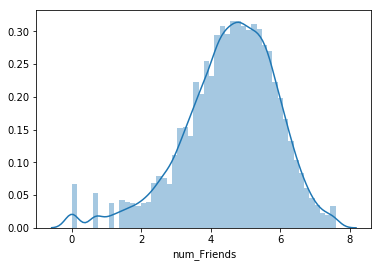

In [172]:
sns.distplot(np.log(df_friend_summary['num_Friends']))

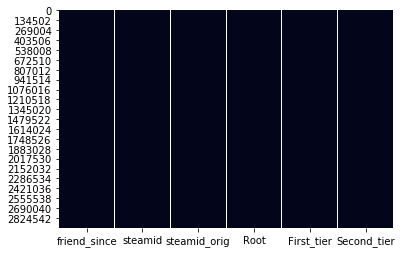

In [173]:
sns.heatmap(df.isnull(), cbar=False)

/anaconda2/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.


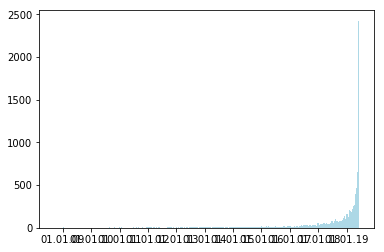

In [178]:
import datetime
# plot it
fig, ax = plt.subplots(1,1)
ax.hist(df_friend_summary[df_friend_summary['newest_friend_time'] > datetime.date(1970,1,2)]['newest_friend_time'], bins=500, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

/anaconda2/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


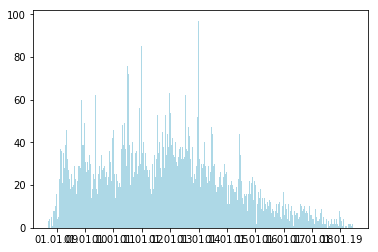

In [179]:
fig, ax = plt.subplots(1,1)
ax.hist(df_friend_summary[df_friend_summary['oldest_friend_time'] > datetime.date(1970,1,2)]['oldest_friend_time'], bins=500, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

In [180]:
df_friend_summary.to_csv('11_June_friend_summary.csv')